<a href="https://colab.research.google.com/github/YumnaZai/ML-Projects/blob/main/ANN_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**♈Artificial Neural Network Model - Good/Bad Radar from Inosphere**

#What Model : Artificial Neural Network Model

### 1. What is solved : Binary classification

### Binary class label indicating "good" or "bad" radar returns

#### It contains data collected by a radar system in Goose Bay, Labrador, which was used to detect free electrons in the ionosphere

## 2. Collect relevent data - Import data

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/Ionosphere.csv"
df = pd.read_csv(url)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


## 3.Encode categorical data-> converting non-numeric data (like categories or labels) into a numeric format so that machine learning models can understand
**No need as the clases are already in 0 and 1**
**No need of one-hot encoding or label encoding**




## Extract the independent and dependent variables

In [ ]:
x = df.drop(columns=['Class'], axis=1)  #independent variables
y = df['Class'] # dependent variable
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: Class, Length: 351, dtype: int64


##4.Normalize/scale numerical data:
**To make sure that all the features have equal contribution to the output**
Often using Min-Max or StandardScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

##5. Split Data to train, validation and test

### Validation set

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2)

#Import Dependencies

In [ ]:
# Import tools to build a neural network
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout

# 4. Choose the Right Architecture

## - Input layers : Number of neurons = 10(input features)

## - Hidden layer 1 : Number of neurons per layer = 5

## - Output layers : Number of neurons = 1

In [ ]:
model= Sequential() #to stack the layers one under the other

# The input layer
model.add(Dense(units=10,activation='relu', input_dim=x_train.shape[1]))
# 10 neurons, relu function, number of input features = input columns

# Second hidden layer
model.add(Dense(units=5,activation='relu'))

# output layer
model.add(Dense(units=1,activation='sigmoid'))
# 1 neuron, sigmoid- (only 0 and 1 as output)

model.summary()
# how many layers, how many parameters, shape of input and output at each step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

#5. Compile Model

## Loss function: Binary classification: binary_crossentropy

## Optimizer: SGD

## Evaluation metrics: Accuracy

In [ ]:
# Binary Calssifcation
model.compile(loss= 'binary_crossentropy',
              optimizer='sgd',
              metrics =['accuracy'])
# loss = 'binary_crossentropy' - how to measure error
# optimizer ='sgd' - how to adjust itself to reduce the error
# metrics = ['accuracy'] - track accuracy

#6. Train the Model
- Feed the training data in batches over epochs

- Monitor performance on validation data

**Optional**
- Use callbacks:

  EarlyStopping: Stop training if no improvement

  ModelCheckpoint: Save best-performing model

In [ ]:
# Training the model
model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=100, batch_size=32)
#batch_size - > how many smaples are passed at once
#Epoch -> one full pass through the entire training dataset

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.3414 - loss: 0.7864 - val_accuracy: 0.3944 - val_loss: 0.7507
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3352 - loss: 0.7557 - val_accuracy: 0.4085 - val_loss: 0.7304
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.3860 - loss: 0.7321 - val_accuracy: 0.6197 - val_loss: 0.7155
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6640 - loss: 0.7082 - val_accuracy: 0.6901 - val_loss: 0.7044
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6889 - loss: 0.7051 - val_accuracy: 0.6901 - val_loss: 0.6961
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6737 - loss: 0.6953 - val_accuracy: 0.6620 - val_loss: 0.6899
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6553 - loss: 0.6932 - val_accuracy: 0.6338 - val_loss: 0.6846
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6667 - loss: 0.6737 - val_accuracy: 0.6479 - val_loss

In [ ]:
y_nn_train_pred = model.predict(x_train)
y_nn_test_pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
print(y_nn_train_pred)

[[0.6375388 ]
 [0.54353184]
 [0.6604442 ]
 [0.613454  ]
 [0.5080979 ]
 [0.66853464]
 [0.6375051 ]
 [0.5613096 ]
 [0.65208817]
 [0.6658387 ]
 [0.6431275 ]
 [0.6651717 ]
 [0.6077186 ]
 [0.62367773]
 [0.44845423]
 [0.21232972]
 [0.6370574 ]
 [0.66853464]
 [0.5207448 ]
 [0.62269217]
 [0.66823053]
 [0.6321292 ]
 [0.23102246]
 [0.6240916 ]
 [0.43956447]
 [0.66853464]
 [0.34106603]
 [0.66853464]
 [0.66603434]
 [0.2973565 ]
 [0.5834439 ]
 [0.66756314]
 [0.24793164]
 [0.66853464]
 [0.6418523 ]
 [0.5219692 ]
 [0.23849133]
 [0.32962686]
 [0.6156379 ]
 [0.60425544]
 [0.46175778]
 [0.3924646 ]
 [0.66853464]
 [0.65647554]
 [0.6028659 ]
 [0.5939753 ]
 [0.54662627]
 [0.5919437 ]
 [0.6539419 ]
 [0.37985668]
 [0.6223549 ]
 [0.6569706 ]
 [0.4743376 ]
 [0.6631825 ]
 [0.6313829 ]
 [0.6677586 ]
 [0.6231345 ]
 [0.6551299 ]
 [0.13149829]
 [0.6195433 ]
 [0.66853464]
 [0.6667427 ]
 [0.5041107 ]
 [0.637596  ]
 [0.6248097 ]
 [0.42412287]
 [0.6310663 ]
 [0.6595103 ]
 [0.66853464]
 [0.6378864 ]
 [0.66685873]
 [0.65

# 7. Evaluate the Model
- Use metrics appropriate to the task:
  Classification: Accuracy, F1-score, Confusion matrix

In [ ]:
# As the output are probabailities, Convert them class lables first
y_nn_train_pred_lables = (y_nn_train_pred > 0.5).astype(int)
y_nn_test_pred_labels = (y_nn_test_pred > 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train
accuracy_train = accuracy_score(y_train, y_nn_train_pred_lables) # Calculate
precision_train = precision_score(y_train, y_nn_train_pred_lables ) #calculate
recall_train = recall_score(y_train, y_nn_train_pred_lables)
f1_train = f1_score(y_train, y_nn_train_pred_lables)
confusion_train = confusion_matrix(y_train, y_nn_train_pred_lables)

# Test
accuracy_test = accuracy_score(y_test, y_nn_test_pred_labels)
precision_test = precision_score(y_test, y_nn_test_pred_labels)
recall_test = recall_score(y_test, y_nn_test_pred_labels)
f1_test = f1_score(y_test, y_nn_test_pred_labels)
confusion_test = confusion_matrix(y_test, y_nn_test_pred_labels)

In [ ]:
print("NN Acuuracy (Train):",accuracy_train)
print("NN Precision (Train):",precision_train)
print("NN Recall (Test):",recall_train)
print("NN fl (Test):",f1_train)
print("NN Confusion matrix (Train):", confusion_train)

NN Acuuracy (Train): 0.7785714285714286
NN Precision (Train): 0.7479338842975206
NN Recall (Test): 0.9945054945054945
NN fl (Test): 0.8537735849056604
NN Confusion matrix (Train): [[ 37  61]
 [  1 181]]


In [ ]:
print("NN Acuuracy (Test):",accuracy_test)
print("NN Precision (Test):",precision_test)
print("NN Recall (Test):",recall_test)
print("NN fl (Test):",f1_test)
print("NN Confusion matrix (Test):", confusion_test)

NN Acuuracy (Test): 0.7887323943661971
NN Precision (Test): 0.7413793103448276
NN Recall (Test): 1.0
NN fl (Test): 0.8514851485148515
NN Confusion matrix (Test): [[13 15]
 [ 0 43]]


#Model Visualization

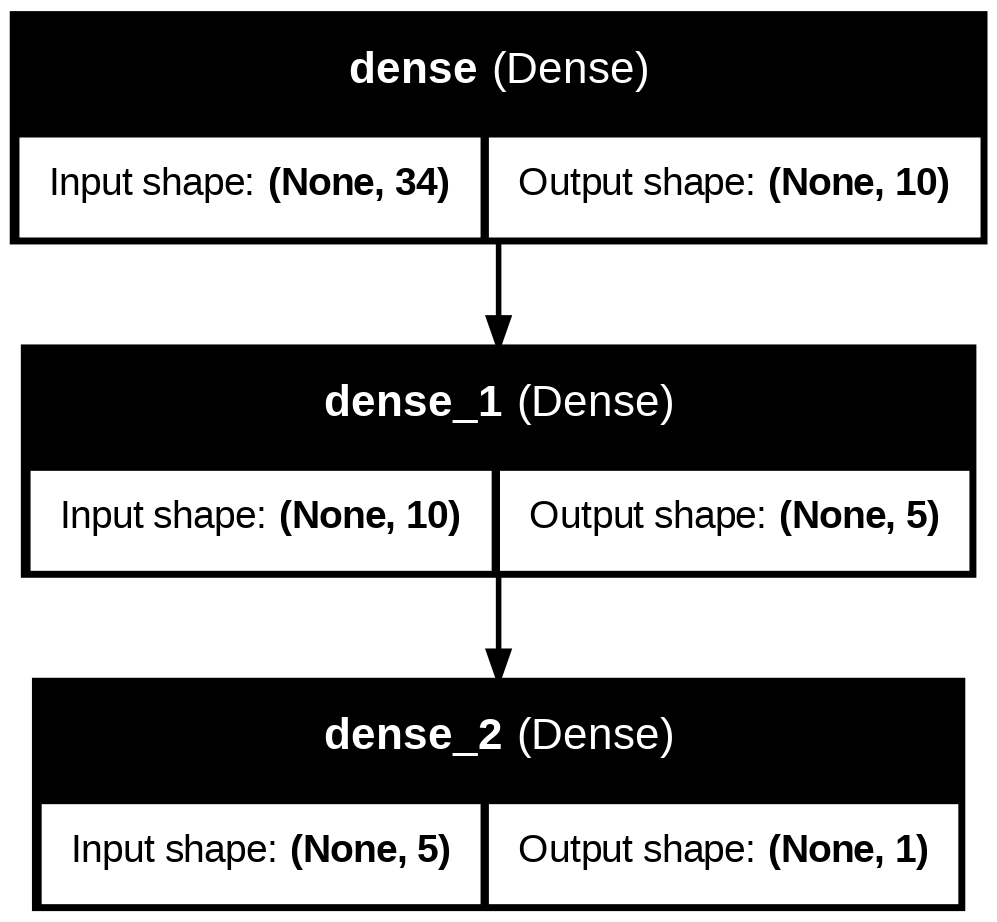

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
model.save_weights('Inosphere_radar.weights.h5')